# Kings County Real Estate - Housing Analysis

## Business Question:

 * Kings County Real Estate has hired us to help them find housing for new hires.
 * They would like us to make a model to predict housing prices.
 * From that model, they would like to know which factors have the largest effect on price.

## Data Questions:

1. What features have the largest effect on price and how (negatively, positively)? 

## Data - Importing & Cleaning:

The dataset "kc_house_data.csv" was obtained from the link below.

https://osf.io/twq9p/

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats


sns.set_style("whitegrid")
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)})

##### The following is a function to download via pandas csv, excel, or json files to jupyter notebook:

In [2]:
def files_import_pd(file_path):
    if file_path.endswith("csv"):
        return pd.read_csv(file_path)
    if file_path.endswith("tsv"):
        return pd.read_csv(file_path, sep="\t")
    if file_path.endswith("xlsx"):
        return pd.read_excel(file_path)
    if file_path.endswith("json"):
        return pd.read_json(file_path)
    else:
        print("NOT CSV/TSV/EXCEL/JSON FILE")

In [3]:
df1 = files_import_pd(r"C:\Users\bigbenx3\2021_flatiron\flatiron_projects\housing_analysis_project\kc_house_data.csv")
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Good. Imported the first dataframe. Let's look at its contents.
***Objective: Checking for nulls.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

So it appears there are no missing/ empty values.

## Data - Manipulation

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

So, there are 21 columns, aka our features, and we don't need all of them.

In [7]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now, we want to drop certain columns to simplify the model we will make. And before we do that, we will create a copy of this original data frame. 

In [8]:
df_drop_cols = df1.copy()

In [9]:
df_drop_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
df = df1[["sqft_lot", "sqft_living",
                    "grade", "condition", "bathrooms", "bedrooms",
                    "waterfront", "price", "floors", "lat", "long"]]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   grade        21613 non-null  int64  
 3   condition    21613 non-null  int64  
 4   bathrooms    21613 non-null  float64
 5   bedrooms     21613 non-null  int64  
 6   waterfront   21613 non-null  int64  
 7   price        21613 non-null  float64
 8   floors       21613 non-null  float64
 9   lat          21613 non-null  float64
 10  long         21613 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


From 21 to 14 columns to account for.

## Exploratory Analysis

#### Prices Overview

The dependent variable here is price of the homes. Let's get a sense of the prices.

In [12]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

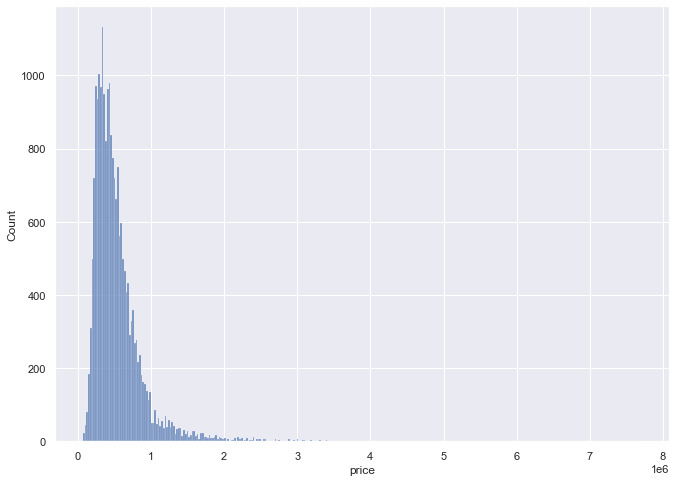

In [13]:
sns.histplot(df.price)

The distribution is skewed. Let's see what the 99th percentile for the prices is.

In [14]:
pct99 =np.percentile(df['price'], 99)
pct99

1964400.0000000051

Filtering out the top 1% of houses by price should help us get a better model for 99% of homes.

In [15]:
df = df[df['price'] <= pct99 ]
df99= df

<AxesSubplot:xlabel='price', ylabel='Count'>

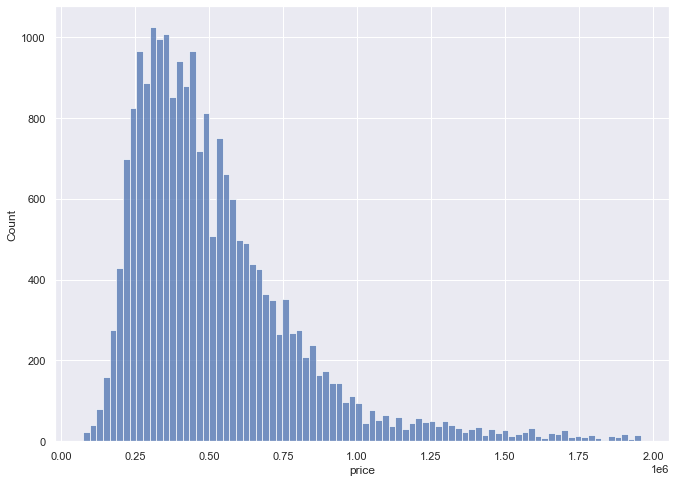

In [16]:
sns.histplot(df.price)

Looks better, but still a little skewed.

In [17]:
df.price.describe()

count    2.139600e+04
mean     5.181153e+05
std      2.845875e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.960000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

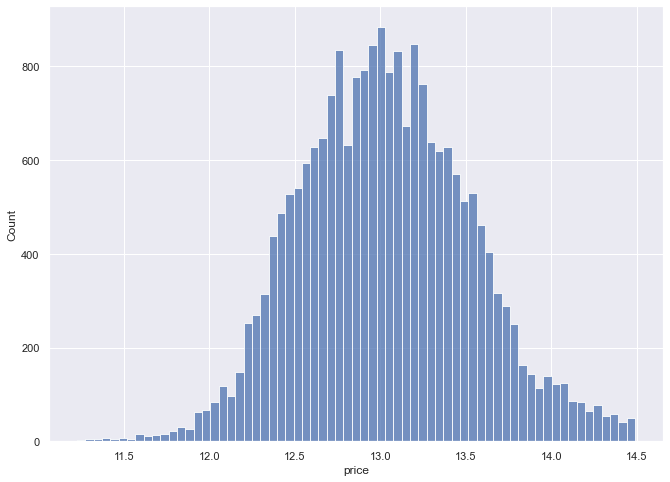

In [18]:
sns.histplot(np.log(df.price))

Now that we have a more gaussian distribution for the price, let's continue to look at the other features.

#### Living Space Square Footage

In [19]:
df.sqft_living.describe()

count    21396.000000
mean      2050.491400
std        861.406875
min        290.000000
25%       1420.000000
50%       1900.000000
75%       2520.000000
max       7730.000000
Name: sqft_living, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

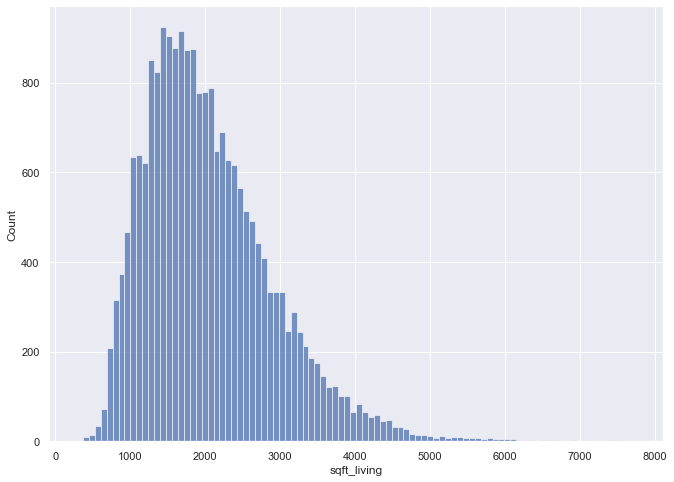

In [20]:
sns.histplot(df['sqft_living'])

Let's normalize plot, give it more of a bell curve.

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

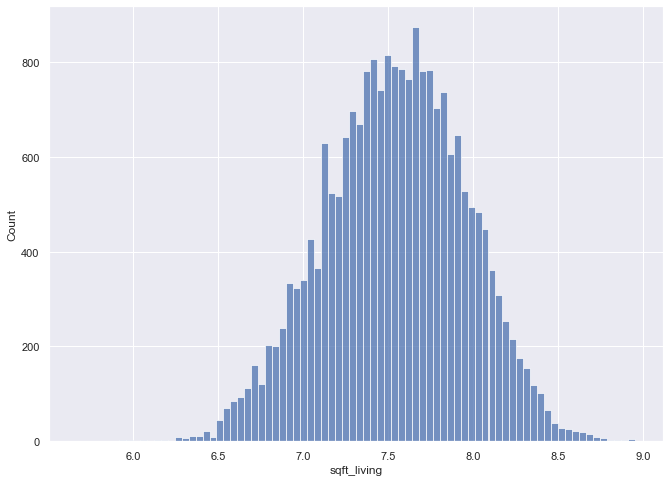

In [21]:
sns.histplot(np.log(df['sqft_living']))

#### Lot Square Footage

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

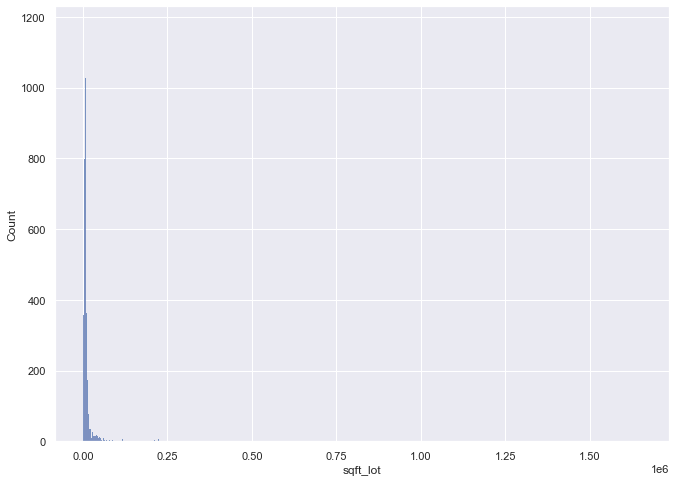

In [22]:
sns.histplot(df.sqft_lot)

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

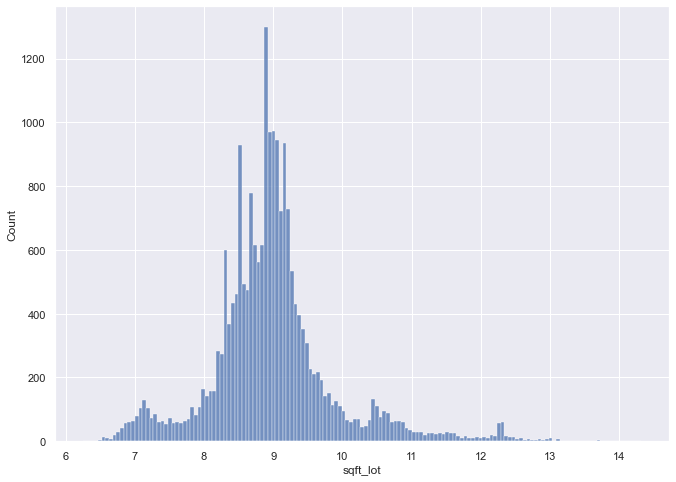

In [23]:
sns.histplot(np.log(df.sqft_lot))

The regular histogram is incredibly hard to discern the correlation with price.
As it seems the correlation with price isn't all that high anyway, we will probably end up dropping this feature later on.

#### Location

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Price by Location')]

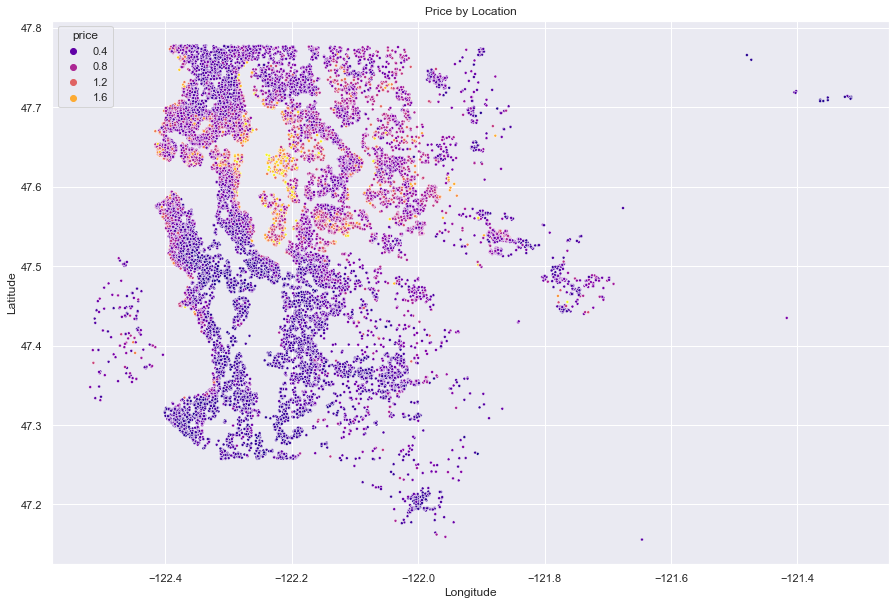

In [24]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df['long'], y=df['lat'], hue=df['price'], palette="plasma",
                     marker='.')
ax.set( xlabel='Longitude',
        ylabel='Latitude', 
        title='Price by Location')

Seems there is an epicenter, where most of the most expensive properties are located. The farther you go from the central point, majority of the homes begin to lead towards mid to lower price range.

In [25]:
ms_lat, ms_long = 47.6101, -122.2015
sea_lat, sea_long = 47.608013, -122.335167

df['ms_dist'] = np.sqrt(abs(df['lat'] - ms_lat)**2 + (abs(df['long'] - ms_long))**2)

df['sea_dist'] = np.sqrt(abs(df['lat'] - sea_lat)**2 + (abs(df['long'] - sea_long))**2)

In [26]:
df.sea_dist.describe()

count    21396.000000
mean         0.203128
std          0.123045
min          0.016318
25%          0.096304
50%          0.182459
75%          0.288522
max          1.025555
Name: sea_dist, dtype: float64

<AxesSubplot:xlabel='ms_dist', ylabel='price'>

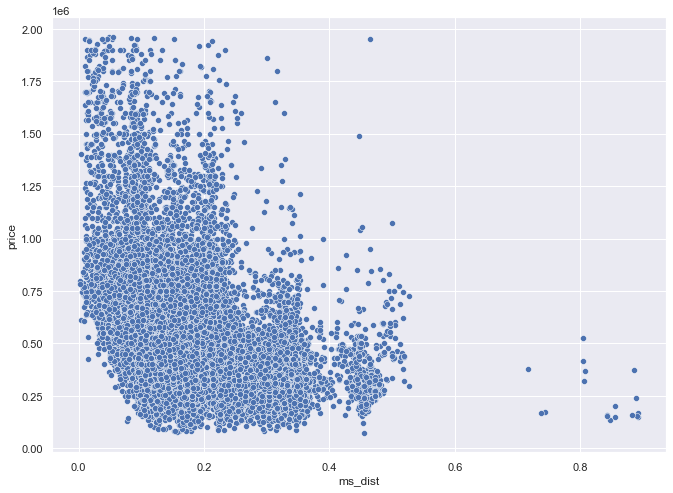

In [27]:
sns.scatterplot(data=df, x='ms_dist', y='price')

<AxesSubplot:xlabel='sea_dist', ylabel='price'>

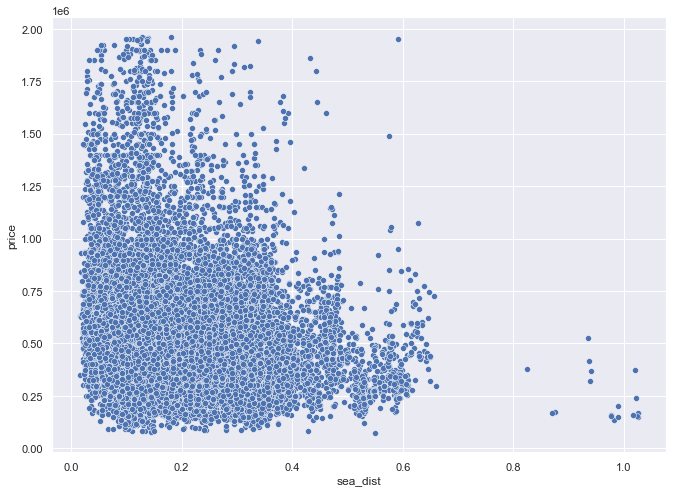

In [28]:
sns.scatterplot(data=df, x='sea_dist', y='price')

In terms of latitude, we can see that a particular area has higher prices. This feature can be utilized to show how far away a house is from the latitude of 47.65.

In [29]:
df['lat'] = df['lat'].apply(lambda x: abs(x - 47.65))

<AxesSubplot:xlabel='lat', ylabel='price'>

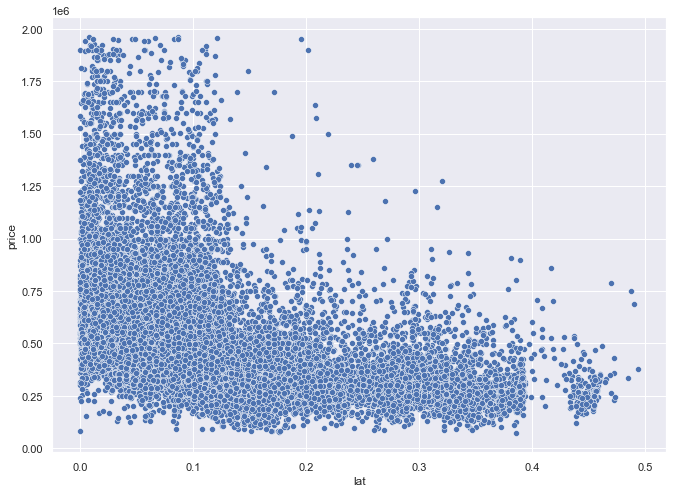

In [30]:
sns.scatterplot(x=df.lat, y=df.price)

In [31]:
df[df['lat'] == 0]

,sqft_lot,sqft_living,grade,condition,bathrooms,bedrooms,waterfront,price,floors,lat,long,ms_dist,sea_dist
188,2400,1330,6,4,1.00,4,0,615000.0,1.5,0.0,-122.340,0.144133,0.042264
5496,4400,1760,7,4,1.75,2,0,640000.0,1.0,0.0,-122.340,0.144133,0.042264
5518,35536,3410,10,3,2.25,5,0,815000.0,2.0,0.0,-122.155,0.061272,0.184995
15677,5600,1990,8,3,1.75,3,0,779000.0,1.0,0.0,-122.415,0.217196,0.090201
19764,11063,5610,11,3,4.00,4,0,1583000.0,3.0,0.0,-122.065,0.142212,0.273410


In [32]:
df['lat'] = df['lat'].apply(lambda x: abs(x - (-122.2)))

Longitude is going to be a more difficult feature to do similar analysis as the latitude.

#### Bedrooms

In [33]:
df.bedrooms.describe()

count    21396.000000
mean         3.360909
std          0.923862
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [34]:
df.bedrooms.value_counts(normalize=True)

3     0.457515
4     0.317115
2     0.128903
5     0.071929
6     0.012105
1     0.009301
7     0.001542
0     0.000608
8     0.000467
9     0.000280
10    0.000140
33    0.000047
11    0.000047
Name: bedrooms, dtype: float64

Homes having 33 bedrooms is very unlikely, which indicates that's a likely outlier.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

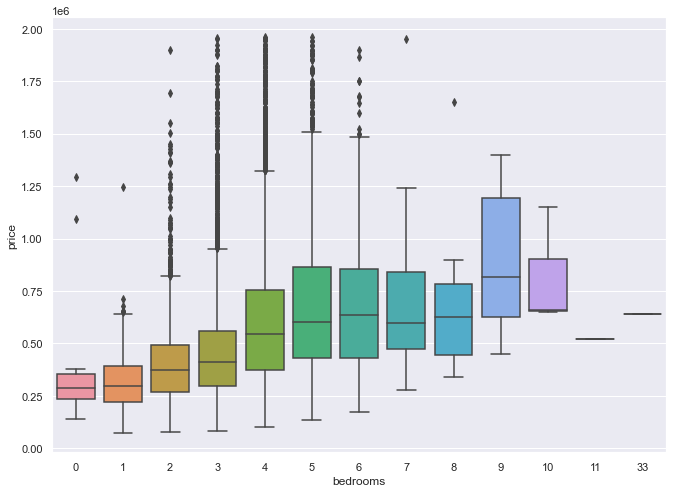

In [35]:
sns.boxplot(data=df, x='bedrooms', y='price')

To simplify, we will group any home with 5+ bathrooms to be in the 5 bathroom category.

In [36]:
def bed_fix(x):
     if x > 5:
        return 5
     else:
        return x

In [37]:
df['bedrooms'] = df['bedrooms'].apply(bed_fix)

In [38]:
df['bedrooms'].value_counts(normalize=True)

3    0.457515
4    0.317115
2    0.128903
5    0.086558
1    0.009301
0    0.000608
Name: bedrooms, dtype: float64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

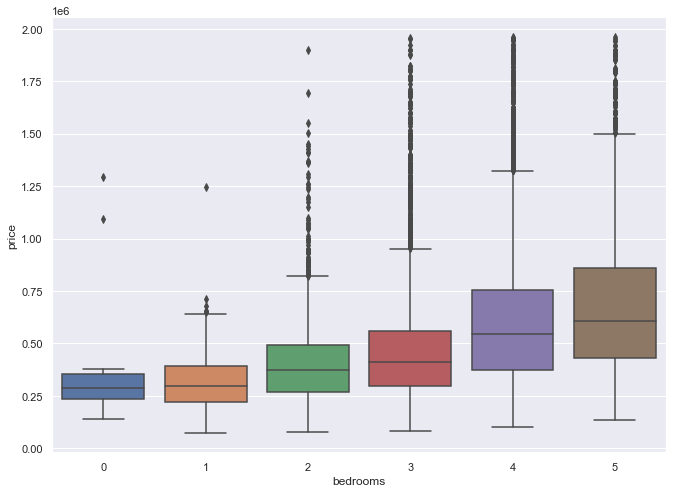

In [39]:
sns.boxplot(data=df, x='bedrooms', y='price')

#### Bathrooms

In [40]:
df.bathrooms.describe()

count    21396.000000
mean         2.097460
std          0.746921
min          0.000000
25%          1.500000
50%          2.250000
75%          2.500000
max          7.500000
Name: bathrooms, dtype: float64

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

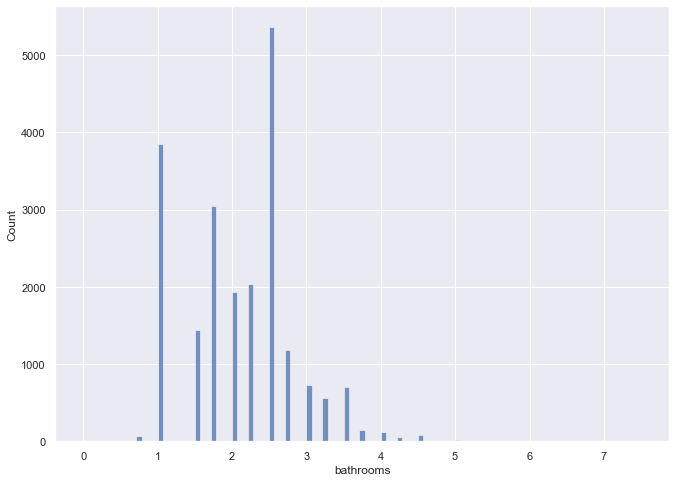

In [41]:
sns.histplot(df['bathrooms'])

Let's see the value counts behind this plot.

In [42]:
df.bathrooms.value_counts()

2.50    5361
1.00    3852
1.75    3046
2.25    2041
2.00    1929
1.50    1446
2.75    1180
3.00     735
3.50     708
3.25     555
3.75     140
4.00     115
4.50      87
0.75      72
4.25      59
5.00      16
0.00      10
4.75      10
1.25       9
5.25       9
5.50       4
0.50       4
5.75       3
6.00       2
7.50       1
6.75       1
6.50       1
Name: bathrooms, dtype: int64

Floats might not actually run well, so we'll round up the bathrooms to the nearest whole number. Also, having partial bathrooms will make the visuals seem cluttered.

In [43]:
df

,sqft_lot,sqft_living,grade,condition,bathrooms,bedrooms,waterfront,price,floors,lat,long,ms_dist,sea_dist
0,5650,1180,7,3,1.00,3,0,221900.0,1.0,122.3388,-122.257,0.113408,0.124430
1,7242,2570,7,3,2.25,3,0,538000.0,2.0,122.2710,-122.319,0.161571,0.114138
2,10000,770,6,3,1.00,2,0,180000.0,1.0,122.2879,-122.233,0.131625,0.165254
3,5000,1960,7,5,3.00,4,0,604000.0,1.0,122.3292,-122.393,0.211298,0.104646
4,8080,1680,8,3,2.00,3,0,510000.0,1.0,122.2332,-122.045,0.156643,0.290300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1131,1530,8,3,2.50,3,0,360000.0,3.0,122.2493,-122.346,0.169814,0.091928
21609,5813,2310,8,3,2.50,4,0,400000.0,2.0,122.3393,-122.362,0.188787,0.100945
21610,1350,1020,7,3,0.75,2,0,402101.0,2.0,122.2556,-122.299,0.098756,0.038644
21611,2388,1600,8,3,2.50,3,0,400000.0,2.0,122.3155,-122.069,0.152550,0.276132


In [44]:
df['bathrooms'] = df['bathrooms'].round() + 1

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

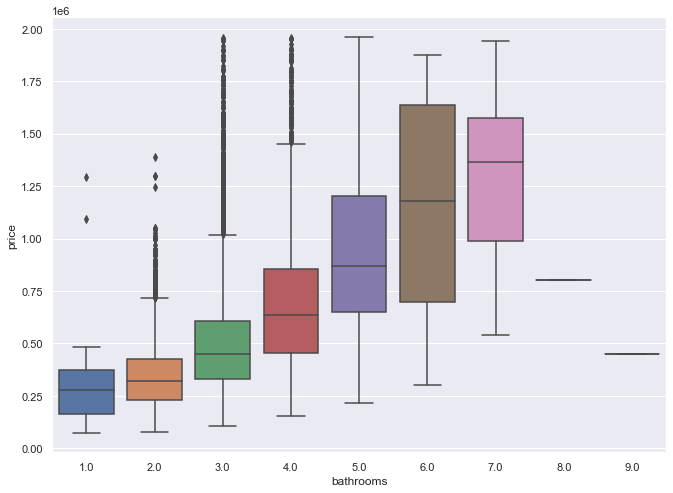

In [45]:
sns.boxplot(data=df, x='bathrooms', y='price')

#### Grade

In [46]:
df.grade.value_counts(normalize=True)

7     0.419705
8     0.283324
9     0.121238
6     0.095251
10    0.049916
11    0.015143
5     0.011311
12    0.002524
4     0.001355
3     0.000140
1     0.000047
13    0.000047
Name: grade, dtype: float64

In [47]:
def gr_fix(x):
    if x < 8:
        return 1
    elif x < 11:
        return 2
    elif x <13:
        return 3
    else:
        return 4

In [48]:
df['grade'] = df['grade'].apply(gr_fix)

<AxesSubplot:xlabel='grade', ylabel='price'>

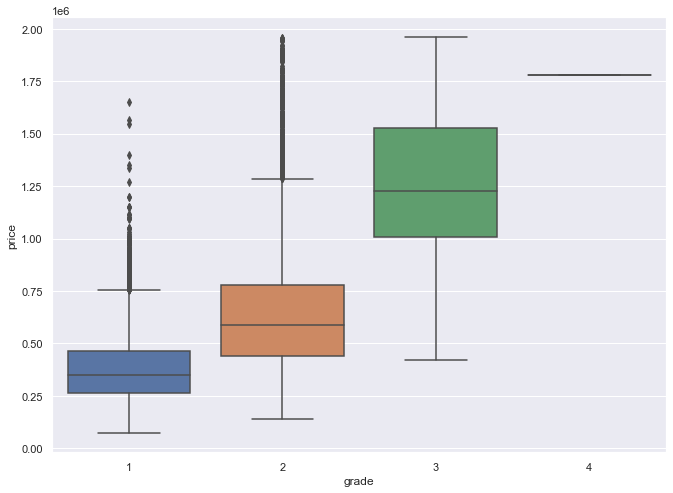

In [49]:
sns.boxplot(data=df, x='grade', y='price')

#### Condition

<AxesSubplot:xlabel='condition', ylabel='price'>

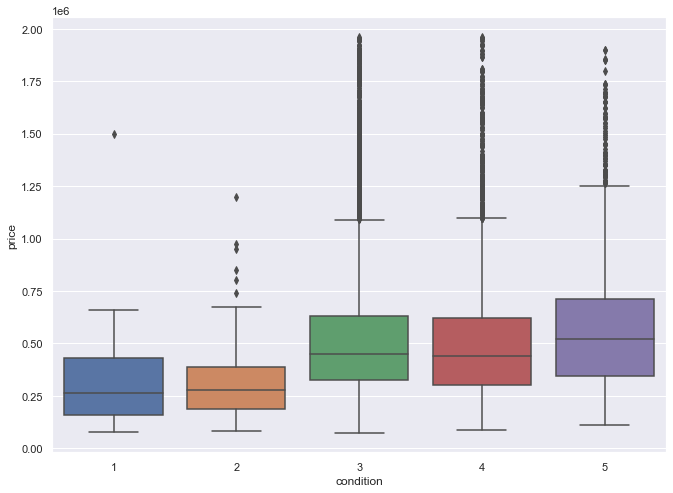

In [50]:
sns.boxplot(data=df, x='condition', y='price')

In [51]:
df.condition.value_counts()

3    13897
4     5630
5     1668
2      171
1       30
Name: condition, dtype: int64

There does seem to be an increase in price if the condition is 3 or higher; correlation with price is around 0.03.

#### Waterfront

In [52]:
df.loc[df.waterfront.isnull(), :]

,sqft_lot,sqft_living,grade,condition,bathrooms,bedrooms,waterfront,price,floors,lat,long,ms_dist,sea_dist


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21396 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     21396 non-null  int64  
 1   sqft_living  21396 non-null  int64  
 2   grade        21396 non-null  int64  
 3   condition    21396 non-null  int64  
 4   bathrooms    21396 non-null  float64
 5   bedrooms     21396 non-null  int64  
 6   waterfront   21396 non-null  int64  
 7   price        21396 non-null  float64
 8   floors       21396 non-null  float64
 9   lat          21396 non-null  float64
 10  long         21396 non-null  float64
 11  ms_dist      21396 non-null  float64
 12  sea_dist     21396 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 2.8 MB


<AxesSubplot:xlabel='waterfront', ylabel='price'>

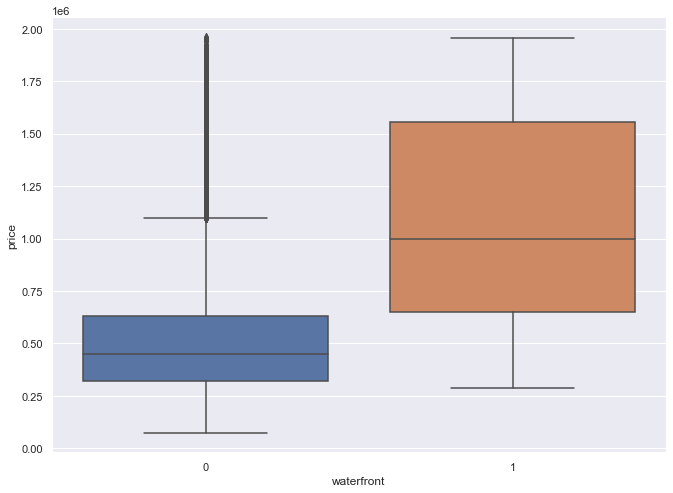

In [54]:
sns.boxplot(data=df, x='waterfront', y='price')

Significant increase in mean price for homes with waterfront than those without.

#### Floors

<AxesSubplot:xlabel='floors', ylabel='price'>

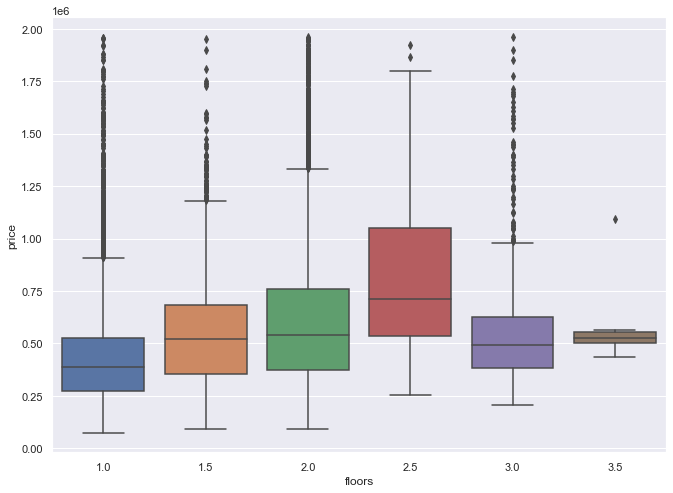

In [55]:
sns.boxplot(data=df, x='floors', y='price')

In [56]:
df.isnull().sum()

sqft_lot       0
sqft_living    0
grade          0
condition      0
bathrooms      0
bedrooms       0
waterfront     0
price          0
floors         0
lat            0
long           0
ms_dist        0
sea_dist       0
dtype: int64

No nulls.

### Looking at Multicolinearity

In [57]:
corr_matrix = df.corr()
print(corr_matrix["price"].sort_values(ascending=False))

price          1.000000
sqft_living    0.678890
grade          0.565959
bathrooms      0.494224
bedrooms       0.327835
floors         0.279157
waterfront     0.143603
sqft_lot       0.098376
long           0.041352
condition      0.036670
sea_dist      -0.196902
ms_dist       -0.380403
lat           -0.483122
Name: price, dtype: float64


Living area and grade have the highest correlations with price.

## Data Modeling

Let's prepare a model and see where our features are at.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21396 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     21396 non-null  int64  
 1   sqft_living  21396 non-null  int64  
 2   grade        21396 non-null  int64  
 3   condition    21396 non-null  int64  
 4   bathrooms    21396 non-null  float64
 5   bedrooms     21396 non-null  int64  
 6   waterfront   21396 non-null  int64  
 7   price        21396 non-null  float64
 8   floors       21396 non-null  float64
 9   lat          21396 non-null  float64
 10  long         21396 non-null  float64
 11  ms_dist      21396 non-null  float64
 12  sea_dist     21396 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 2.8 MB


#### Model 0

In [59]:
X = df.drop('price', 1)
y =df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [60]:
predictors = sm.add_constant(X_train)
model_0 = sm.OLS(y_train , predictors).fit()
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     3396.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        04:38:00   Log-Likelihood:            -2.2890e+05
No. Observations:               17116   AIC:                         4.578e+05
Df Residuals:                   17103   BIC:                         4.579e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.181e+08   3.02e+06     39.113      0.000    1.12e+08    1.24e+08
sqft_lot        0.3427      0.030     11.488      0.000       0.284       0.401
sqft_living   187.8509      2.438     77.040      0.000     183.071     192.630
grade        9.641e+04   3096.441     31.134      0.000    9.03e+04    1.02e+05
condition    4.101e+04   1914.163     21.422      0.000    3.73e+04    4.48e+04
bathrooms    1.521e+04   2308.171      6.591      0.000    1.07e+04    1.97e+04
bedrooms    -2.377e+04   1827.671    -13.005      0.000   -2.74e+04   -2.02e+04
waterfront   4.932e+05   1.59e+04     31.000      0.000    4.62e+05    5.24e+05
floors      -5233.9185   2652.087     -1.974      0.048   -1.04e+04     -35.556
lat         -9.721e+05   2.14e+04    -45.353      0.000   -1.01e+06    -9.3e+05
long        -6573.7489   3.26e+04     -0.202      0.840   -7.04e+04    5.73e+04
ms_dist     -4.749e+04   3.28e+04     -1.449      0.147   -1.12e+05    1.68e+04
sea_dist    -2.231e+05    5.2e+04     -4.287      0.000   -3.25e+05   -1.21e+05
==============================================================================
Omnibus:                     5701.737   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31294.479
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                       8.903   Cond. No.                     1.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Squred value is decent - An R^2 of 1 indicates that the regression predictions perfectly fit the data.
Near zero p-values indicated strong evidence that the null hypothesis be rejected.
<b>High Condition number</b>... something to watch out for too.

In [61]:
lr= LinearRegression()
lr.fit(X_train, y_train)

# Use Linear Regression to make predictions for train and test data
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)


# Calculate Root Mean Square Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

# Calculate Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_hat_test)
train_mae = mean_absolute_error(y_train, y_hat_train)

print(f'Train Root Mean Square Error: {train_rmse}')
print(f'Test Root Mean Square Error: {test_rmse}')

print(f'Train Mean Absolute Error: {train_mae}')
print(f'Test Mean Absolute Error: {test_mae}')

Train Root Mean Square Error: 155550.77823335704
Test Root Mean Square Error: 149230.9369541536
Train Mean Absolute Error: 107836.19413130336
Test Mean Absolute Error: 104834.51400288452


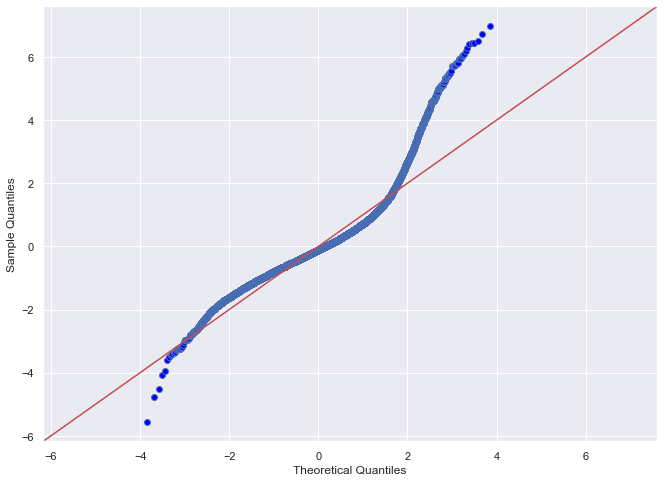

In [62]:
fig = sm.graphics.qqplot(model_0.resid, dist=stats.norm, line='45', fit=True)

This residual plot is not good, room for improvement.

#### Model 1.0

The main goal of this model is to see if scaling helps in any way.

In [63]:
price_log = np.log(df.price)
price_log = pd.DataFrame(price_log)

In [64]:
X1 = df.drop('price', 1)
y1 =price_log

In [65]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=11)

In [66]:
scaler = StandardScaler()
scalerp = StandardScaler()

X_train1[['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'ms_dist', 'lat', 'long']]  =scaler.fit_transform(X_train1[['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'ms_dist', 'lat', 'long']])


X_test1[['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'ms_dist', 'lat', 'long']] = scaler.transform(X_test1[['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'ms_dist', 'lat', 'long']])


y_train1 = scalerp.fit_transform(pd.DataFrame(y_train1))
y_test1 = scalerp.transform(pd.DataFrame(y_test1))

<ipython-input-66-6bc1e6e74f22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1[['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'ms_dist', 'lat', 'long']]  =scaler.fit_transform(X_train1[['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'ms_dist', 'lat', 'long']])
C:\Users\bigbenx3\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-inpu

In [67]:
predictors = sm.add_constant(X_train1)
model_1 = sm.OLS(y_train1 , predictors).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     4623.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        04:38:00   Log-Likelihood:                -11916.
No. Observations:               17116   AIC:                         2.386e+04
Df Residuals:                   17103   BIC:                         2.396e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0801      0.040    -26.694      0.000      -1.159      -1.001
sqft_lot        0.0570      0.004     14.557      0.000       0.049       0.065
sqft_living     0.4920      0.007     74.984      0.000       0.479       0.505
grade           0.3733      0.010     38.632      0.000       0.354       0.392
condition       0.1576      0.006     26.391      0.000       0.146       0.169
bathrooms       0.0362      0.005      6.905      0.000       0.026       0.046
bedrooms       -0.0192      0.005     -3.981      0.000      -0.029      -0.010
waterfront      1.2798      0.050     25.774      0.000       1.182       1.377
floors          0.0142      0.004      3.177      0.001       0.005       0.023
lat            -0.5072      0.007    -72.069      0.000      -0.521      -0.493
long           -0.0408      0.014     -2.845      0.004      -0.069      -0.013
ms_dist         0.0115      0.009      1.259      0.208      -0.006       0.029
sea_dist       -0.0993      0.162     -0.611      0.541      -0.418       0.219
==============================================================================
Omnibus:                      547.767   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1419.138
Skew:                          -0.104   Prob(JB):                    6.89e-309
Kurtosis:                       4.395   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The issue with the condition number is gone. And r-squared has jumped from 70.4 to 76.4%.

In [68]:
lr1= LinearRegression()
lr1.fit(X_train1, y_train1)


# Use Linear Regression to make predictions for train and test data
y_hat_train = lr1.predict(X_train1)
y_hat_test = lr1.predict(X_test1)



# Undo scale
y_train1 = scalerp.inverse_transform(y_train1)
y_test1 = scalerp.inverse_transform(y_test1)
y_hat_train = scalerp.inverse_transform(y_hat_train)
y_hat_test = scalerp.inverse_transform(y_hat_test)

# Undo log
y_train1 = np.exp(y_train1)
y_test1 = np.exp(y_test1)
y_hat_train = np.exp(y_hat_train)
y_hat_test = np.exp(y_hat_test)


# Calculate Root Mean Square Error
train_rmse1 = np.sqrt(mean_squared_error(y_train1, y_hat_train))
test_rmse1 = np.sqrt(mean_squared_error(y_test1, y_hat_test))

# Calculate Mean Absolute Error
test_mae1 = mean_absolute_error(y_test1, y_hat_test)
train_mae1 = mean_absolute_error(y_train1, y_hat_train)

print(f'Train Root Mean Square Error: {train_rmse1}')
print(f'Test Root Mean Square Error: {test_rmse1}')

print(f'Train Mean Absolute Error: {train_mae1}')
print(f'Test Mean Absolute Error: {test_mae1}')

Train Root Mean Square Error: 158716.6589115366
Test Root Mean Square Error: 149325.24845132575
Train Mean Absolute Error: 96415.18304103208
Test Mean Absolute Error: 92785.17474944367


In [69]:
y_hat_test

array([[679147.97345576],
       [251024.51452835],
       [580786.14990831],
       ...,
       [184327.50859161],
       [247898.39871407],
       [577882.75333187]])

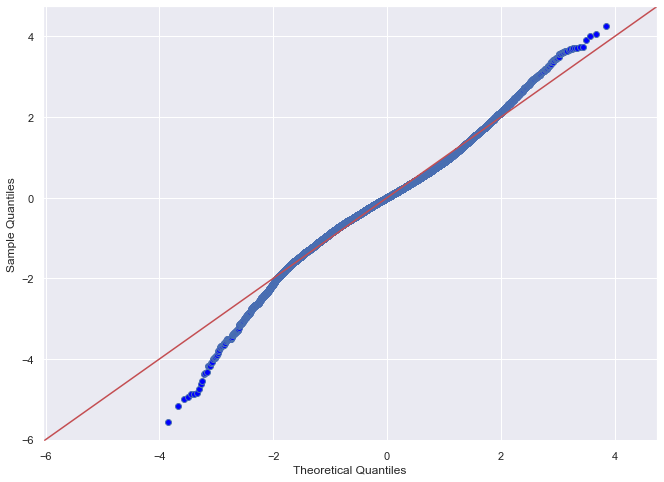

In [70]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

In [72]:
results = [ ['Model 0', train_rmse, test_rmse, train_mae, test_mae],
            ['Model 1',train_rmse1, test_rmse1, train_mae1, test_mae1]]

df_results = pd.DataFrame(results, columns=['Model', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE'])
df_results

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Model 0,155550.778233,149230.936954,107836.194131,104834.514003
1,Model 1,158716.658912,149325.248451,96415.183041,92785.174749


#### Choosing the Model

Typically lower RSME shows better fit to the line.

In [75]:
Xf = df.drop('price', 1)

scalerf= StandardScaler()

Xf[['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'ms_dist', 'lat', 'long']]  =scalerf.fit_transform(Xf[['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'ms_dist', 'lat', 'long']])

scalerfp = StandardScaler()

price_sc = scalerp.transform(pd.DataFrame(df.price))

y_hat = lr1.predict(Xf)

y_hat = np.exp(scalerp.inverse_transform(y_hat))

y_hat

rmse_f = np.sqrt(mean_squared_error(df.price , y_hat))
mae_f = mean_absolute_error(df.price, y_hat)

In [76]:
print(f'Root Mean Square Error: {rmse_f}')
print(f'Mean Absolute Error: {mae_f}')


Root Mean Square Error: 157185.97726530675
Mean Absolute Error: 95724.06047258788


In [77]:
mae_f

95724.06047258788

In [78]:
mae_f/df.price.mean()

0.18475434798972265

<AxesSubplot:ylabel='Count'>

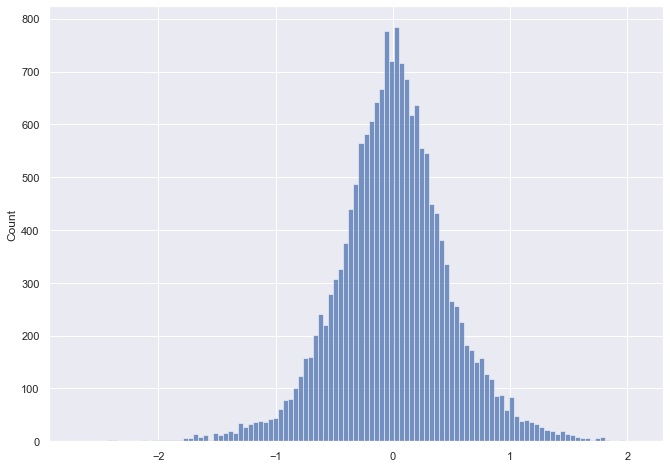

In [79]:
sns.histplot(model_1.resid)

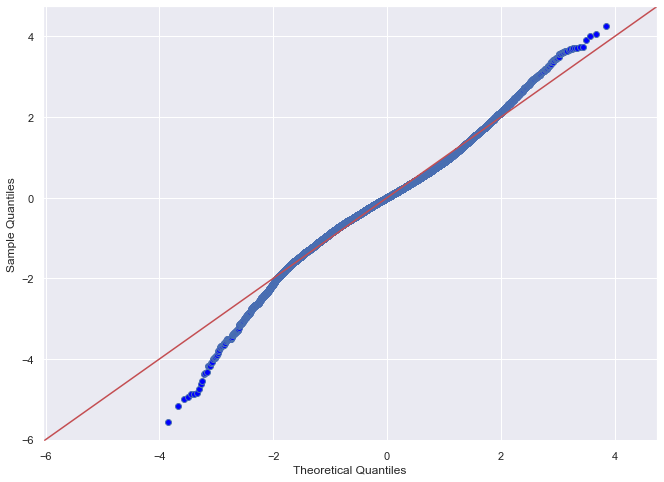

In [80]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

<AxesSubplot:>

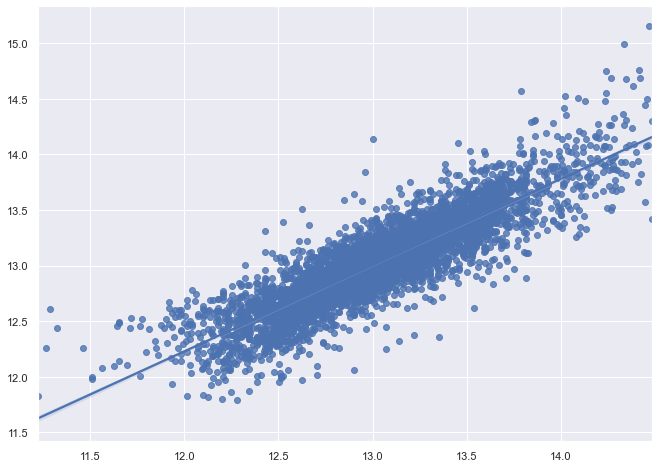

In [83]:
sns.regplot(x=np.log(y_test1), y=np.log(y_hat_test))

The majority of the plot conforms to the best fit line.

## Data Question - Answers:

1. The factors most affecting the price of a house are:

     -Living area(sqft_living)
    
    
    -Location(lat)
    
    -whether or not it's a waterfront property
    
    -Quality of the house(grade)

## Conclusions:

* We have a model that has an Coefficient of Determination(R-squared) value of 0.764 which indicates that our model can explain 76.4% of all variation in the data around the mean.

* With a Mean Squared Error of around 81,500 USD, that means our predicted price is, on average, 81,500 USD off from our mean of approximately 518,500 USD. While that number doesn't look too bad our Root Mean Squared Error is around 124,000 USD which means that our model is being heavily penalized for predictions that are very far off the actual price.


## Future Research

* The data we were provided is at least 6 years old which makes it pretty outdated.  Acquiring a more recent dataset would help make the findings more relevant to the present.

* We should be able to get a lot more out of the location data.  I would like to make a gradient of the price with the latitude/longitude as the x/y axis.  We can use this gradient to give weighted values to specific coordinates.

* The most obvious next step is to try out new modeling techniques.  While linear regression is a good start, there are many other techniques that I believe could help make better predictions.  Of particular insterest to me in this context are Polynomial Regression and Weighted Least Squares.